In [1]:
import scipy.io
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import expit
from sklearn import linear_model

In [2]:
def sigmoid(z):
    g = np.zeros(z.shape)
    g = expit(z)
    return g

In [3]:
def displayData(X, example_width=None):
    m,n = X.shape
    plt.figure()
    if X.ndim == 1:
        X = np.reshape(X, (-1,m))
    if not example_width or not 'example_width' in locals():
        example_width = int(round(math.sqrt(X.shape[1])))
    plt.set_cmap("gray")
    example_height = n / example_width
    display_rows = int(math.floor(math.sqrt(m)))
    display_cols = int(math.ceil(m / display_rows))
    pad = 1
    display_array = -np.ones((pad + display_rows * int(example_height + pad),  pad + display_cols * int(example_width + pad)))
    curr_ex = 1
    for j in range(1,display_rows+1):
        for i in range (1,display_cols+1):
            if curr_ex > m:
                break
            max_val = max(abs(X[curr_ex-1, :]))
            rows = pad + (j - 1) * (int(example_height) + pad) + np.array(range(int(example_height)))
            cols = pad + (i - 1) * (int(example_width)  + pad) + np.array(range(int(example_width)))
            display_array[rows[0]:rows[-1]+1 , cols[0]:cols[-1]+1] = np.reshape(X[curr_ex-1, :], (int(example_height), int(example_width)), order="F") / max_val
            curr_ex += 1
            if curr_ex > m:
                break
    h = plt.imshow(display_array, vmin=-1, vmax=1)
    plt.axis('off')
    plt.show(block=False)
    return h, display_array


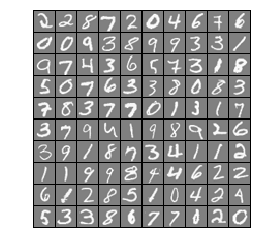

In [4]:
input_layer_size = 400
num_labels = 10
data = scipy.io.loadmat('hand_written_numbers.mat')
X=data["X"]
y=data["y"]
m,n=X.shape
y=y.flatten()
rand_indices = np.random.permutation(m)
random_images = X[rand_indices[:100],:]
displayData(random_images);

In [5]:
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X, y);

In [6]:
pred = logreg.predict(X);
print('Training Set Accuracy: {:f}'.format((np.mean(pred == y%10)*100)));
print('Training Set Accuracy for 1:  {:f}'.format(np.mean(pred[500:1000]  == y.flatten()[500:1000]%10)  * 100));
print('Training Set Accuracy for 2:  {:f}'.format(np.mean(pred[1000:1500] == y.flatten()[1000:1500]%10) * 100));
print('Training Set Accuracy for 3:  {:f}'.format(np.mean(pred[1500:2000] == y.flatten()[1500:2000]%10) * 100));
print('Training Set Accuracy for 4:  {:f}'.format(np.mean(pred[2000:2500] == y.flatten()[2000:2500]%10) * 100));
print('Training Set Accuracy for 5:  {:f}'.format(np.mean(pred[2500:3000] == y.flatten()[2500:3000]%10) * 100));
print('Training Set Accuracy for 6:  {:f}'.format(np.mean(pred[3000:3500] == y.flatten()[3000:3500]%10) * 100));
print('Training Set Accuracy for 7:  {:f}'.format(np.mean(pred[3500:4000] == y.flatten()[3500:4000]%10) * 100));
print('Training Set Accuracy for 8:  {:f}'.format(np.mean(pred[4000:4500] == y.flatten()[4000:4500]%10) * 100));
print('Training Set Accuracy for 9:  {:f}'.format(np.mean(pred[4500:5000] == y.flatten()[4500:5000]%10) * 100));
print('Training Set Accuracy for 10: {:f}'.format(np.mean(pred[0:500]     == y.flatten()[0:500]%10)     * 100));

Training Set Accuracy: 89.020000
Training Set Accuracy for 1:  100.000000
Training Set Accuracy for 2:  99.600000
Training Set Accuracy for 3:  97.400000
Training Set Accuracy for 4:  100.000000
Training Set Accuracy for 5:  98.000000
Training Set Accuracy for 6:  100.000000
Training Set Accuracy for 7:  100.000000
Training Set Accuracy for 8:  97.200000
Training Set Accuracy for 9:  98.000000
Training Set Accuracy for 10: 0.000000


In [ ]:
# Randomize all the digits
rand_indices = np.random.permutation(m)
random_X = X[rand_indices[:m],:]
random_y = y[rand_indices[:m]]
num_digit=int(input("Input the index of the random image you want to predict "))
pred1=logreg.predict(random_X[num_digit,:].reshape(1,-1))
print("Predicted digit ", pred1)
print("Actual digit ",random_y[num_digit])
plt.imshow((random_X[num_digit,:].reshape(20,20)).T)
plt.show()